<a href="https://colab.research.google.com/github/mjgpinheiro/Econophysics/blob/main/Money_Tensor_Exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-cadddc246bc6>:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  time_periods = pd.date_range(start="2000-01-01", periods=50, freq='Y')
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.1627 - mae: 0.3018 - val_loss: 0.1081 - val_mae: 0.2676
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1628 - mae: 0.3335 - val_loss: 0.0947 - val_mae: 0.2801
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1214 - mae: 0.2853 - val_loss: 0.0950 - val_mae: 0.2853
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1139 - mae: 0.2821 - val_loss: 0.0981 - val_mae: 0.2845
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1271 - mae: 0.2939 - val_loss: 0.0953 - val_mae: 0.2777
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1068 - mae: 0.2737 - val_loss: 0.0875 - val_mae: 0.2680
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1156 - mae: 0.2836 - val_loss: 0.0797 - val_mae: 0.2572
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1162 - mae: 0.2928 - val_loss: 0.0747 - val_mae: 0.2480
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1238 - mae: 

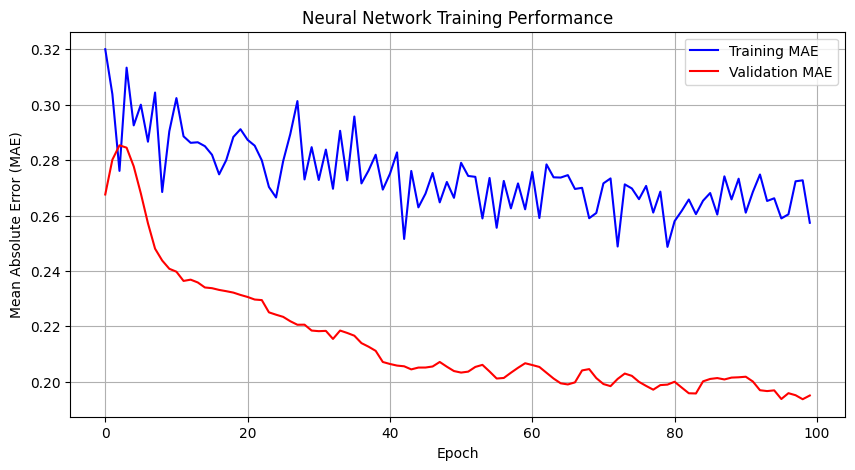

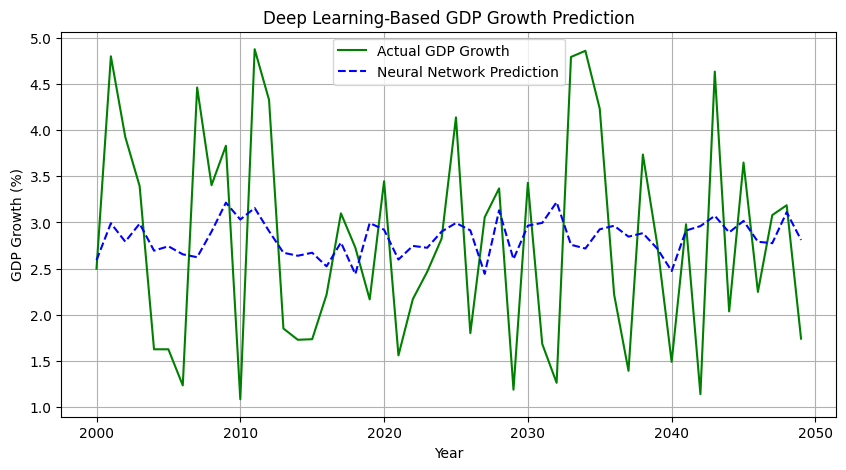

In [1]:
!pip install tensorflow
# Import required deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Simulated Economic Data (50 years)
np.random.seed(42)
time_periods = pd.date_range(start="2000-01-01", periods=50, freq='Y')

# Generate Random Economic Features
gdp_growth = np.random.uniform(1, 5, size=len(time_periods))  # GDP growth rate (%)
sectoral_productivity = np.random.uniform(50, 200, size=len(time_periods))
economic_resistance = np.random.uniform(0.1, 1.0, size=len(time_periods))

# Create DataFrame
df = pd.DataFrame({
    'Year': time_periods.year,
    'GDP Growth (%)': gdp_growth,
    'Sectoral Productivity Index': sectoral_productivity,
    'Economic Resistance': economic_resistance
})

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[['Sectoral Productivity Index', 'Economic Resistance']])
y_scaled = scaler.fit_transform(df[['GDP Growth (%)']])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Define the Neural Network Model
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Predicting GDP growth (continuous value)
])

# Compile the Model
model_nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the Model
history = model_nn.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), verbose=1)

# Predict GDP Growth
df['Neural Network GDP Growth (%)'] = scaler.inverse_transform(model_nn.predict(X_scaled))

# Plot Neural Network Training Progress
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Training MAE', color='blue')
plt.plot(history.history['val_mae'], label='Validation MAE', color='red')
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error (MAE)")
plt.legend()
plt.title("Neural Network Training Performance")
plt.grid()
plt.show()

# Plot Neural Network Predictions vs Actual GDP Growth
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['GDP Growth (%)'], label="Actual GDP Growth", linestyle='solid', color='green')
plt.plot(df['Year'], df['Neural Network GDP Growth (%)'], label="Neural Network Prediction", linestyle='dashed', color='blue')
plt.xlabel("Year")
plt.ylabel("GDP Growth (%)")
plt.legend()
plt.title("Deep Learning-Based GDP Growth Prediction")
plt.grid()
plt.show()
